#                                                 HOTEL BOOKINGS

                    (Paula Gutiérrez, Ferran Boada, Marc Fernández, Miquel Tatje)
                                            Group 6

**OUTLINE**

1.Introduction

2.Data

3.Univariate and bivariate analysis

4.Linear regression

5.Logistic regression

6.ML


**2.Introduction**

The aim of this project is to determine the factors that lead clients to cancel hotel bookings, considering as our dependent variable if the client cancels or not the booking (is_canceled). This model could help to predict and understand the reasons behind hotel booking cancellations and the likelihood of those to happen. In order to study the reasons behind this phenomenon, we apply a statistical approach, from the most typical tools (univariate analysis) to the most challenging ones(logit and ML technniques); the structure of the following work is divided into 5 sections. Before the core, section 2 introduces everything related to data (where we took it from, what's its format, its main variables and some metodological aspects). In section 3 we analysed some of the most relevant variables to see the degree of relevance they could have towards the cancelation decision, individually and in pairs (bivariate). In section 4 we try to show why a linear regression is not the best tool for our study, and why section 5 is necessary, where we present results from a logistic approach. Last but not least, in section 6 a Machine Learning decision tree is applied as a powerful classifier tool to help hotel managers in predicting cancelations.

In [1]:
#First of all, we import the packages that will be needed in order to do the analysis. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
from IPython.core.display import display, HTML
import scipy
import math

**2.Data**

**Description of the variables**
- ADR: Average Daily Rate as defined.
- Adults: Number of adults
- Agent: ID of the travel agency that made the booking.
- ArrivalDateDayOfMonth: Day of the month of the arrival date
- ArrivalDateMonth: Month of arrival date with 12 categories: “January” to “December”
- ArrivalDateWeekNumber: Week number of the arrival date
- ArrivalDateYear: Year of arrival date
- AssignedRoomType: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. 
- Babies: Number of babies.
- BookingChanges: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.
- Children: Number of children
- Company:ID of the company/entity that made the booking or responsible for paying the booking. 
- Country: Country of origin. Categories are represented in the ISO 3155–3:2013 format.
- CustomerType: Type of booking, assuming one of four categories: Contract, Group, Transient, Transiet-party.
- DaysInWaitingList: Number of days the booking was in the waiting list before it was confirmed to the customer.
- DepositType: Indication on if the customer made a deposit to guarantee the booking (No deposit, non refund, reundable). 
- DistributionChannel: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.
- IsCanceled: Value indicating if the booking was canceled (1) or not (0).
- IsRepeatedGuest: Value indicating if the booking name was from a repeated guest (1) or not (0).
- LeadTime: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.
- MarketSegment: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”.
- Meal:Type of meal booked. Categories are presented in standard hospitality meal packages.(Undefined, Bed&Breakfast, Full board).
- PreviousBookingsNotCanceled: Number of previous bookings not cancelled by the customer prior to the current bookings.
- PreviousCancellations: Number of previous bookings that were cancelled by the customer prior to the current booking.
- RequiredCardParkingSpaces:Number of car parking spaces required by the customer.
- ReservationStatus: Reservation last status, assuming one of three categories. (Canceled, Checked Out, No-show). 
- ReservationStatusDate: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel.
- ReservedRoomType: Code of room type reserved.
- StaysInWeekendNights:Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.
- StaysInWeekNights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.
- TotalOfSpecialRequests: Number of special requests made by the customer (e.g. twin bed or high floor.

This dataset, obtained from kaggle but originally was extracted from hotel's Property Management System (PMS) SQL database, contains 31 variables describing bookings (that were canceled but also made the stay) from July 2015 to August 2017 in a resort hotel and in a city hotel from Portugal.

In [2]:
#First of all we load the data 
hotel_data=pd.read_csv('./hotel_bookings.csv')

In [3]:
#We show the first ten rows of the data.
hotel_data.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [4]:
#Type of variables that we have
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
#Main statistics of the variables
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
#We made a copy of the data before we start making changes to it.
hotel_data_copy=hotel_data.copy()

In [7]:
#We look for the variables that contain missing values in order to deal with them. 
hotel_data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
#We drop the values for the variables that have NA values.

# company has > 94% of NA values
hotel_data_copy.drop("company", axis = 1, inplace = True)

# reservation_status is essentially the same as the objective variable, and is added after the hotel stay
hotel_data_copy.drop(["reservation_status", "reservation_status_date"], axis = 1, inplace = True)

In [9]:
#We create a subset in order to do a further analyisis with Machine Learning. 

from sklearn.model_selection import train_test_split

train, test = train_test_split(hotel_data_copy, test_size=0.2, random_state=132)

In [10]:
#We also do a copy of the data of this subset. 
hotel_data_train = train.copy()

**3.Univariate and Bivariate analysis**

In [11]:
# Matplot lip is setted
sns.set_theme(color_codes=True)

In [12]:
# Visualization
def visreg(fit, xvar, by, data, cond=dict()):

    # conditions
    allBy = np.sort(data[by].unique())

    # initializing dataframes
    df0 = pd.DataFrame(np.sort(data[xvar].copy().unique()),columns=[xvar])
    df0[by] = allBy[0]
    df1 = df0.copy()

    # several copies by
    for x in allBy[1:]:
        df1[by] = x
        df0 = df0.append(df1, ignore_index=True)

    for k, v in cond.items():
        df0[k] = v

    # predict
    df0[fit.model.endog_names] = fit.predict(df0)

    ax = sns.lineplot(data = df0, x=xvar, y = fit.model.endog_names, hue = by)
    ax.set_title('Conditional effects plot')
    ax.set(ylabel='Prob(' + fit.model.endog_names + ')')

    return ax

In [13]:
# The bivariate functions are defined in order to further analyse the variables.

def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 10
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def bivar_bin(x,catVar,binVar,method = 'qcut',points = 7, saveTransf=False):
    # options for method: 'qcut', 'cut', None
    ind_transf = 0
    if saveTransf:
        x1 = x
    else:
        x1 = x.copy()

    # partitioning numerical column
    if (catVar in x1.select_dtypes('number').columns) and (method
                                                          in ['qcut','cut']):
        if type(points) is list:
            if len(x1[catVar].unique()) > len(points):
                ind_transf = 1
        else:
            if len(x1[catVar].unique()) > points:
                ind_transf = 1
        if (ind_transf==1) and (method=="qcut"):
            x1[catVar + '_T'] = pd.qcut(x1[catVar], points,duplicates='drop')
            catVar = catVar + '_T'

        if (ind_transf==1) and (method=="cut"):
            x1[catVar + '_T'] = pd.cut(x1[catVar], points,right=False,duplicates='drop')
            catVar = catVar + '_T'

    # generating plots
    sns.set(rc={'figure.figsize':(11,4)})
    fig, ax = plt.subplots(1,2)

    sns.countplot(x=catVar,data=x1, ax=ax[0])
    ax[0].tick_params(labelrotation=90)
    ax[0].set(title=catVar+' distribution')

    sns.barplot(x=catVar,y=binVar, data=x1, ax=ax[1])
    ax[1].tick_params(labelrotation=90)
    ax[1].set(ylabel='Propensity '+binVar, title=binVar + ' % by '+catVar)

    # adding percentage to countplot
    without_hue(ax[0],x1[catVar])

In [14]:
no_people = (hotel_data_train.children == 0) & (hotel_data_train.adults == 0) & (hotel_data_train.babies == 0)
hotel_data_train = hotel_data_train[-no_people]
hotel_data_train.shape

(95361, 29)

In [15]:
# printing each unique value for each categorical variable

#for column in categorical_columns_df.columns:
    #print(f"{column}: \n {categorical_columns_df[column].unique()}\n")

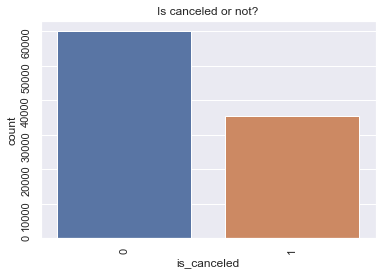

In [16]:
#The dependent variable is defined by if the clients have cancelled.
ax = sns.countplot(data=hotel_data_train, x="is_canceled")
ax.tick_params(labelrotation=90)
ax.set(title="Is canceled or not?");

As the plot shows, most of the observations are not cancelations, but the amount of cases in every category is more than large enough for statistical purposes.

- Lead time


In [17]:
hotel_data_train["log_lead_time"]=np.log(hotel_data_train["lead_time"])
hotel_data_train.log_lead_time.replace([np.inf, -np.inf], np.nan, inplace=True)
hotel_data_train.drop(hotel_data_train[hotel_data_train['log_lead_time'].isnull()].index, inplace = True)

/Users/marc/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 0.98, 'Log Lead Time Distribution')

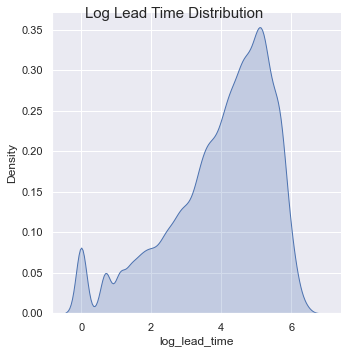

In [18]:
distribution=sns.displot(hotel_data_train,x="log_lead_time",kind="kde",fill=True)
distribution.fig.suptitle("Log Lead Time Distribution",fontsize=15)

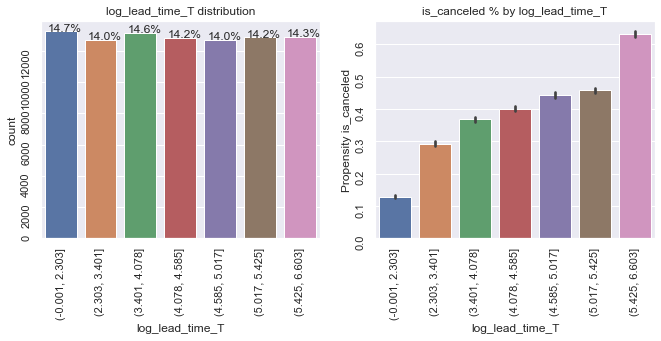

In [19]:
bivar_bin(hotel_data_train,catVar="log_lead_time",binVar="is_canceled")

Lead time is the first interesting variable. It's transformed into log(lead_time) and then ploted in intervals of equal amount; the univariate distribution of log(lead_time) is quite homogeneous, and the relationship with cancelations is clearly positive and steep(the propensity to cancelate is correlated with the booking time interval length). 
- ADR

/Users/marc/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/marc/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


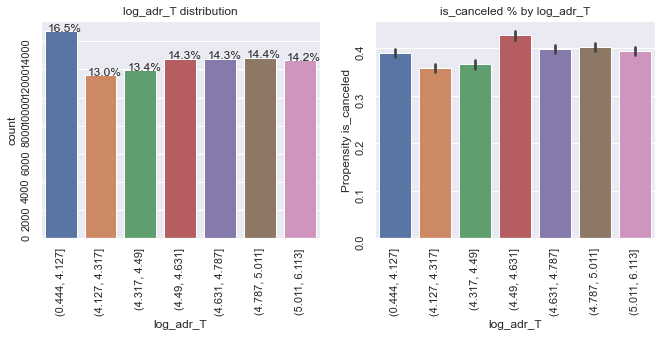

In [20]:
hotel_data_train.drop(hotel_data_train[hotel_data_train['adr'] >= 500].index, inplace = True)
hotel_data_train["log_adr"]=np.log(hotel_data_train["adr"])
hotel_data_train.log_adr.replace([np.inf, -np.inf], np.nan, inplace=True)
hotel_data_train.drop(hotel_data_train[hotel_data_train['log_adr'].isnull()].index, inplace = True)
hotel_data_train.drop(hotel_data_train[hotel_data_train['log_adr'] <= 0].index, inplace = True)
bivar_bin(hotel_data_train,catVar="log_adr",binVar="is_canceled")

Text(0.5, 0.98, 'Log ADR Distribution')

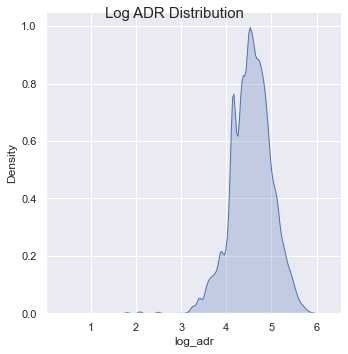

In [21]:
hotel_data_train.drop(hotel_data_train[hotel_data_train['log_adr'] <= 0].index, inplace = True)
distribution=sns.displot(hotel_data_train,x="log_adr",kind="kde",fill=True)
distribution.fig.suptitle("Log ADR Distribution",fontsize=15)

In [22]:
hotel_data_train.adr.value_counts()

62.00     2986
75.00     2025
90.00     1949
65.00     1807
80.00     1465
          ... 
204.44       1
75.24        1
122.11       1
124.90       1
156.14       1
Name: adr, Length: 7876, dtype: int64

ADR is the variable which refers to the average "price" or spenditure by hosts. Log(ADR) is symetrically distributed around 4,5 (4,5=log(spenditure)) and seems normal in the graph above. The bivariate analysis indicates that ADR seems not very important as a cancelation determinant since the confidence intervals of most of the sample subsections overlap each other.

- Children

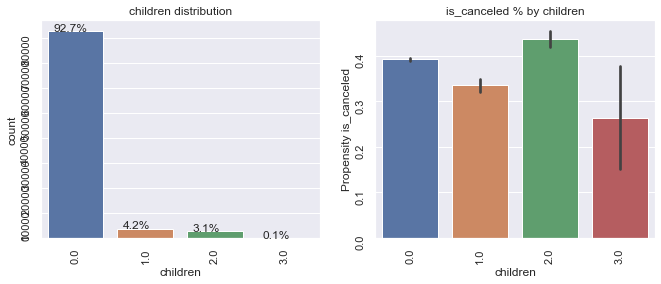

In [23]:
hotel_data_train.drop(hotel_data_train[hotel_data_train['children'] >= 5].index, inplace = True)
bivar_bin(hotel_data_train,catVar="children",binVar="is_canceled",method="cut",
          saveTransf=True)

The variable children indicates the number of children in the booking, but the highest values are dropped and the training-sample values are comprised between 0 and 3. More than 92%of the values are at 0, and the propensity to cancelate seems to be significantly diferent in 0,1 and 2 children, being the last category the most likely.

- Meal

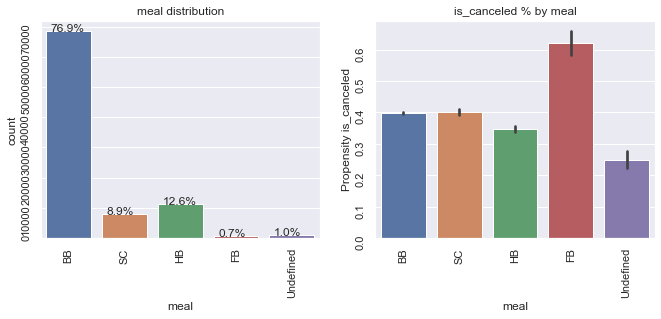

In [24]:
bivar_bin(hotel_data_train,catVar="meal",binVar="is_canceled")

Similarly, the meal variable (categories of service types), is quite concentrated; 76% of the observations are in the BB (bed and breakfast), and the FB service (full board) is the only that affects positively cancelations (that is, the probability to cancelate is greater only if clients book full board services).

- Distribution channel

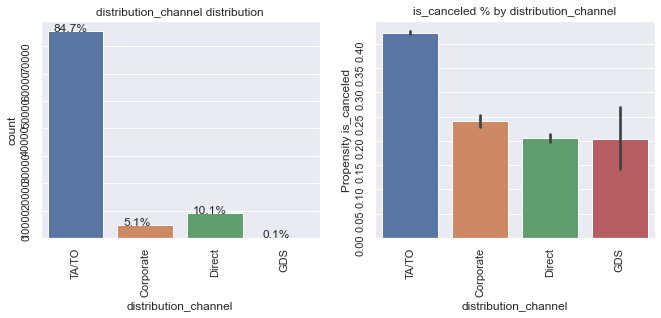

In [25]:
hotel_data_train.drop(hotel_data_train[hotel_data_train['distribution_channel'] == "Undefined"].index, inplace = True)
bivar_bin(hotel_data_train,catVar="distribution_channel",binVar="is_canceled")

- Hotel

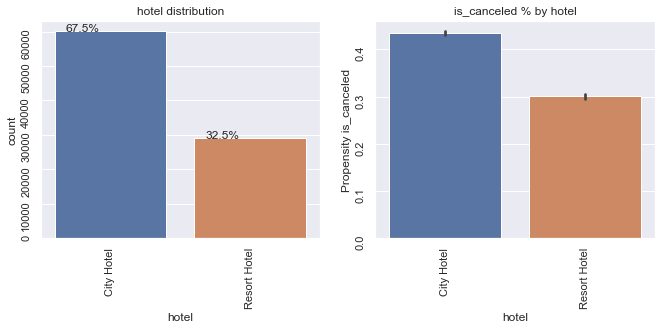

In [26]:
bivar_bin(hotel_data_train,catVar="hotel",binVar="is_canceled")

- Is repeated guest

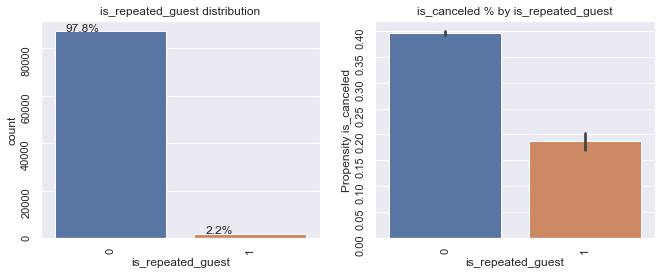

In [27]:
bivar_bin(hotel_data_train,catVar="is_repeated_guest",binVar="is_canceled")

- Reserved room type

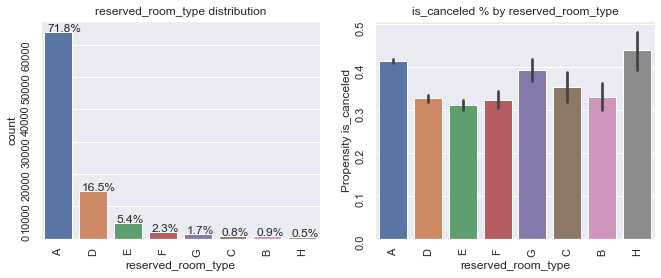

In [28]:
bivar_bin(hotel_data_train,catVar="reserved_room_type",binVar="is_canceled")

- Deposit type

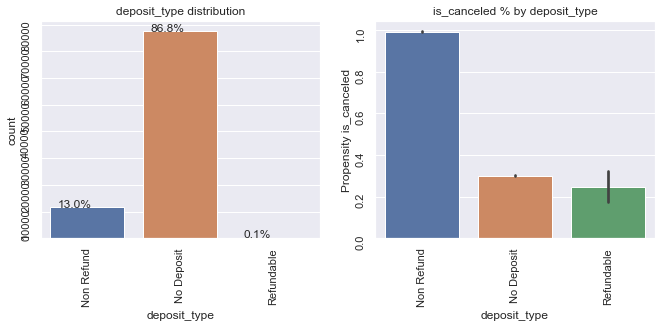

In [29]:
bivar_bin(hotel_data_train,catVar="deposit_type",binVar="is_canceled")

- Arrival date

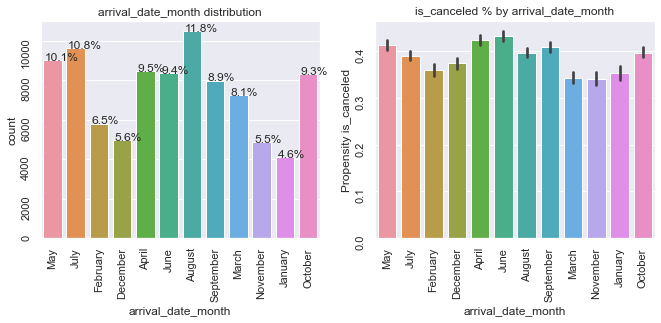

In [30]:
bivar_bin(hotel_data_train,catVar="arrival_date_month",binVar="is_canceled")

- Is canceled (Dependent variable)

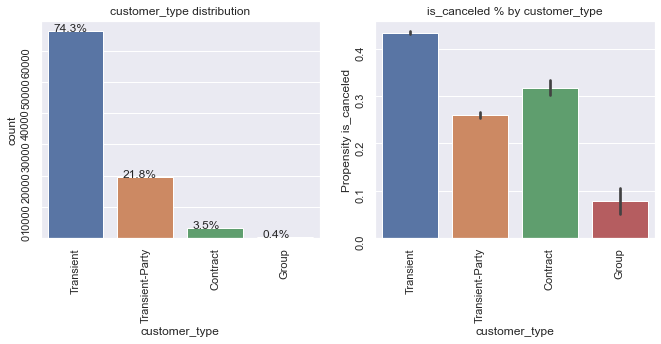

In [31]:
bivar_bin(hotel_data_train,catVar="customer_type",binVar="is_canceled")

- Stays in week nights

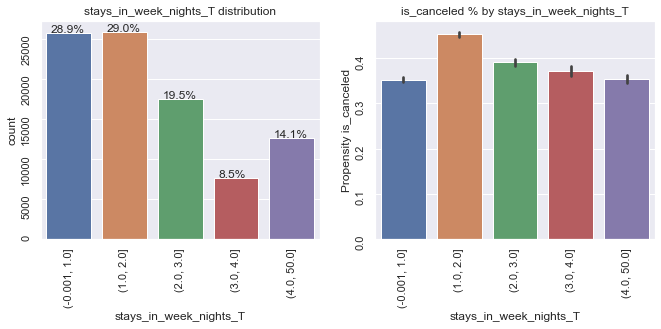

In [32]:
bivar_bin(hotel_data_train,catVar="stays_in_week_nights",binVar="is_canceled")

- Stays in weekend nights

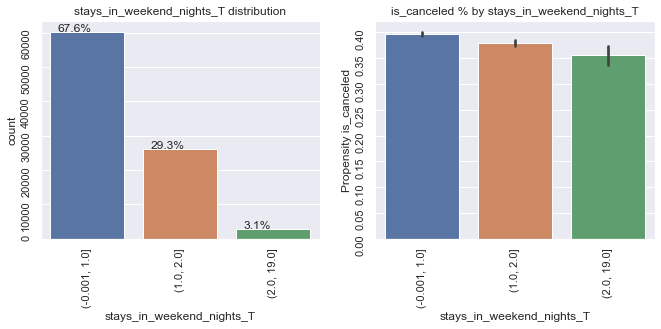

In [33]:
bivar_bin(hotel_data_train,catVar="stays_in_weekend_nights",binVar="is_canceled")

**5. Linear regression**

The first approach to examining our data is to create a linear model to see it would perform. As we shall see, it turns out not to be an appropiate model because of the nature of our data, seeing that we have mostly dichotomic variables.

In [34]:
re0 = smf.ols(formula='is_canceled ~ log_lead_time', data=hotel_data_train).fit()  #specification and fitting
re0.summary()    # summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            is_canceled   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     8116.
Date:                Tue, 22 Mar 2022   Prob (F-statistic):               0.00
Time:                        23:54:00   Log-Likelihood:                -58718.
No. Observations:               89232   AIC:                         1.174e+05
Df Residuals:                   89230   BIC:                         1.175e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0039      0.005      0.845      0.398      -0.005       0.013
log_lead_time     0.0966      0.001     90.088      0.000       0.095       0.099
==============================================================================
Omnibus:                   450164.206   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11113.134
Skew:                           0.345   Prob(JB):                         0.00
Kurtosis:                       1.415   Cond. No.                         13.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

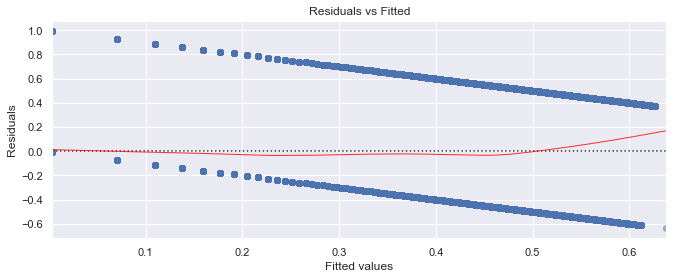

In [35]:
# fitted values
model_fitted_y = re0.fittedvalues

#  Plot
plot = sns.residplot(x=model_fitted_y, y='is_canceled', data=hotel_data_train, lowess=True,
                     scatter_kws={'alpha': 0.5},
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

# Title and labels
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals');

Residual values for this regression show correlation, they are very large. Fitted values show results between 0 and 1, but this would not be a valid outcome, because a guest can either cancel (1) or not (0).

**6. Logistic regression**

As a second approach, we carried out a logistic regression. This regression is the right model to fit our data (binary dependent variable).

In [36]:
re1 = sm.Logit.from_formula(formula='is_canceled ~ log_lead_time', data=hotel_data_train).fit()
re1.summary()    # summary

Optimization terminated successfully.
         Current function value: 0.623464
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_canceled   No. Observations:                89232
Model:                          Logit   Df Residuals:                    89230
Method:                           MLE   Df Model:                            1
Date:                Tue, 22 Mar 2022   Pseudo R-squ.:                 0.06849
Time:                        23:54:03   Log-Likelihood:                -55633.
converged:                       True   LL-Null:                       -59723.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -2.4417      0.026    -93.115      0.000      -2.493      -2.390
log_lead_time     0.4819      0.006     82.089      0.000       0.470       0.493
=================================================================================
"""

From this regression we can only interpret the sign of the coefficients. As a result, the variable log_lead_time increases the prob of cancelling.

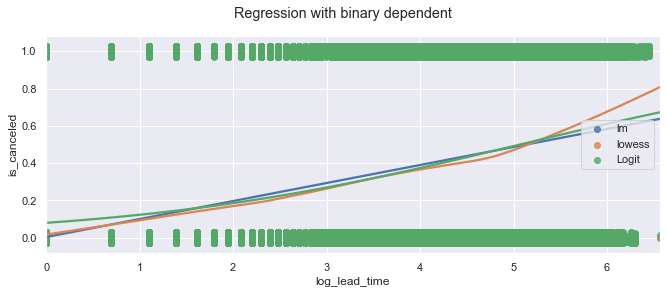

In [37]:
fig, ax = plt.subplots()

sns.regplot(x="log_lead_time", y="is_canceled", data=hotel_data_train,
            ci=None, ax=ax, label="lm")
sns.regplot(x="log_lead_time", y="is_canceled", data=hotel_data_train,
           ci=None, lowess=True, ax=ax, label="lowess");
sns.regplot(x="log_lead_time", y="is_canceled", data=hotel_data_train,
           y_jitter=.03,ci=None, logistic=True, ax=ax, label="Logit");
ax.legend(loc=5);

fig.suptitle('Regression with binary dependent');

6.1.Logistic regression with covariates

In this first logistic regression with more than 1 explanatory variables, we have added "stays_in_week_nights", observing its p-value we can conclude that this variable is significant for our study. It reduces the propensity to cancel (negative sign).

In [38]:
re3 = sm.Logit.from_formula(formula='is_canceled ~ log_lead_time + stays_in_week_nights', data=hotel_data_train).fit()
re3.summary()

Optimization terminated successfully.
         Current function value: 0.620993
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_canceled   No. Observations:                89232
Model:                          Logit   Df Residuals:                    89229
Method:                           MLE   Df Model:                            2
Date:                Tue, 22 Mar 2022   Pseudo R-squ.:                 0.07218
Time:                        23:54:06   Log-Likelihood:                -55412.
converged:                       True   LL-Null:                       -59723.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.3278      0.027    -87.050      0.000      -2.380      -2.275
log_lead_time            0.5064      0.006     84.237      0.000       0.495       0.518
stays_in_week_nights    -0.0824      0.004    -20.469      0.000      -0.090      -0.074
========================================================================================
"""

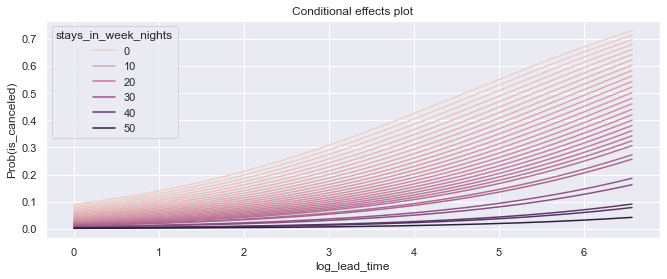

In [39]:
visreg(re3, xvar = "log_lead_time",by = "stays_in_week_nights", data=hotel_data_train);

It can be observed that increasing the variable log_lead_time, increases the probability to cancel independently of the number of nights during the week (monday to friday). In addition, spending 0 nights during the week, so going for a weekend trip, has the highest effect on cancellation, one possible explanation for this fact is that short weekend trips have a lower opportunity cost associated with the cancellation, therefore is more probable to cancel these types of trips.

In [40]:
re4 = sm.Logit.from_formula(formula='is_canceled ~ log_lead_time + stays_in_weekend_nights', data=hotel_data_train).fit()
re4.summary()

Optimization terminated successfully.
         Current function value: 0.621177
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_canceled   No. Observations:                89232
Model:                          Logit   Df Residuals:                    89229
Method:                           MLE   Df Model:                            2
Date:                Tue, 22 Mar 2022   Pseudo R-squ.:                 0.07191
Time:                        23:54:08   Log-Likelihood:                -55429.
converged:                       True   LL-Null:                       -59723.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -2.3597      0.026    -89.206      0.000      -2.412      -2.308
log_lead_time               0.4964      0.006     83.782      0.000       0.485       0.508
stays_in_weekend_nights    -0.1459      0.007    -19.980      0.000      -0.160      -0.132
===========================================================================================
"""

This is an analogue regression using weekend days insted of midweek days.

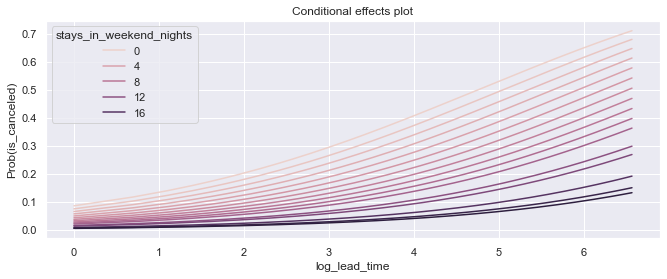

In [41]:
visreg(re4, xvar = "log_lead_time",by = "stays_in_weekend_nights", data=hotel_data_train);

The conclusion here is that same as with the previous case, the shorter a trip is, the lower of the cost of cancelling.

In this regression it was included the variable "is_repeated_guest", to study the effect of whether a costumer has stayed before is a determinant factor on the cancellation.

In [42]:
re5 = sm.Logit.from_formula(formula='is_canceled ~ log_lead_time + is_repeated_guest', data=hotel_data_train).fit()
re5.summary()

Optimization terminated successfully.
         Current function value: 0.623282
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_canceled   No. Observations:                89232
Model:                          Logit   Df Residuals:                    89229
Method:                           MLE   Df Model:                            2
Date:                Tue, 22 Mar 2022   Pseudo R-squ.:                 0.06876
Time:                        23:54:09   Log-Likelihood:                -55617.
converged:                       True   LL-Null:                       -59723.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.4176      0.027    -91.065      0.000      -2.470      -2.366
log_lead_time         0.4775      0.006     80.645      0.000       0.466       0.489
is_repeated_guest    -0.3463      0.062     -5.549      0.000      -0.469      -0.224
=====================================================================================
"""

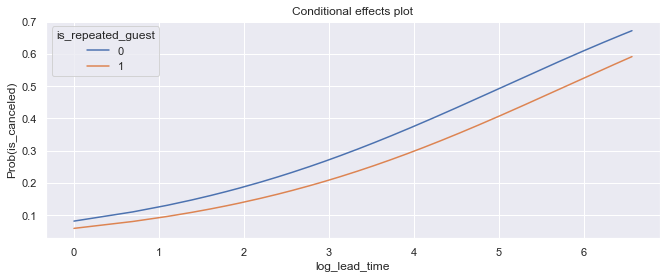

In [43]:
visreg(re5, xvar = "log_lead_time",by = "is_repeated_guest", data=hotel_data_train);

As it can be observed, people who are not a repeated guest are more propense to cancel the booking. Although significant, there is not a huge difference between groups.

In this case we have added the variable "hotel", to study if there is a significant difference in the two types of hotel.

In [44]:
re6 = sm.Logit.from_formula(formula='is_canceled ~ log_lead_time + hotel', data=hotel_data_train).fit()
re6.summary()

Optimization terminated successfully.
         Current function value: 0.616875
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_canceled   No. Observations:                89232
Model:                          Logit   Df Residuals:                    89229
Method:                           MLE   Df Model:                            2
Date:                Tue, 22 Mar 2022   Pseudo R-squ.:                 0.07833
Time:                        23:54:10   Log-Likelihood:                -55045.
converged:                       True   LL-Null:                       -59723.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.2585      0.027    -84.151      0.000      -2.311      -2.206
hotel[T.Resort Hotel]    -0.5376      0.016    -33.892      0.000      -0.569      -0.507
log_lead_time             0.4776      0.006     80.552      0.000       0.466       0.489
=========================================================================================
"""

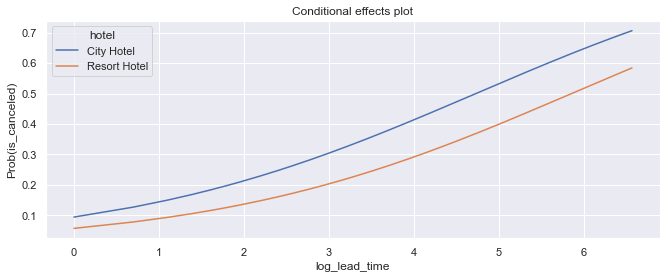

In [45]:
visreg(re6, xvar = "log_lead_time",by = "hotel", data=hotel_data_train);

The results show that people who are planning to go to the city hotel have a higher propensity to cancel. One explanation for this is that people who stay on the city hotel plan to go there for shorter periods of time, and the Resort hotel is more of a vacational type, which is a kind of trip people do only once (maybe twice) per year, so the opportunity cost associated with cancelling is much larger.

In [46]:
re7 = sm.Logit.from_formula(formula='is_canceled ~ log_lead_time + stays_in_week_nights + stays_in_weekend_nights + is_repeated_guest + hotel', data=hotel_data_train).fit()

Optimization terminated successfully.
         Current function value: 0.615773
         Iterations 6


In [47]:
re7.get_margeff(dummy=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:            is_canceled
Method:                          dydx
At:                           overall
===========================================================================================
                             dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
hotel[T.Resort Hotel]      -0.0982      0.004    -27.700      0.000      -0.105      -0.091
log_lead_time               0.1046      0.001     92.161      0.000       0.102       0.107
stays_in_week_nights       -0.0058      0.001     -5.879      0.000      -0.008      -0.004
stays_in_weekend_nights    -0.0148      0.002     -8.334      0.000      -0.018      -0.011
is_repeated_guest          -0.0670      0.013     -5.315      0.000      -0.092      -0.042
===========================================================================================
"""

Hotel: Having a booking in a Resort Hotel represents a decrease of 0.0982 points in cancelling the booking compared to City Hotels.
Log_lead_time: Increasing by 1 unit the logarithm of lead time represents an increase by 0.1046 points in the probability of cancelling.
Stays_in_week_nights: Spending an extra night during week days suposes a decrease of 0.0058 points in the probability of cancelling.
Stays_in_weekend_nights: Spending an extra night during weekend days suposes a decrease of 0.0148 points in the probability of cancelling.
Is_repeated_guest: Being a repeated guest represents a decrease of 0.0670 points in the probability of cancelling compared to not being a repeated guest.

**7.ML**

The first approach is cleaning up the data, because some of the variables we have created prior to this section are suitable for the inferences we have done, but not for an ML model

In [48]:
# Count of the number of appearances per country
countries_freq = hotel_data_train["country"].value_counts(ascending = False)

hotel_data_train[hotel_data_train["is_canceled"] == 0]["country"].value_counts()

PRT    13403
GBR     7527
FRA     6423
ESP     4701
DEU     4697
       ...  
GAB        1
BDI        1
UZB        1
SYC        1
UGA        1
Name: country, Length: 153, dtype: int64

In [49]:
# We are only interested in countries with at least 1000 observations, the rest will be categorized as "others"
countries_to_analize = countries_freq[countries_freq >= 1000]
countries_to_analize

# Change countries with < 1000 appearances to "Other"
other_countries = hotel_data_train["country"].isin(countries_to_analize.index) == False
hotel_data_train.loc[other_countries, "country"] = "Other"

Afterwards, we store the categorical and numerical column names to decide which to use in each step of the Pipeline, and transform the numerical variables to make it easier to work with

In [50]:
categorical_columns = [column for column in hotel_data_train.columns if hotel_data_train[column].dtype == 'O']

categorical_columns_df = hotel_data_train[categorical_columns]

categorical_columns_df

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
51122,City Hotel,May,BB,PRT,Offline TA/TO,TA/TO,A,A,Non Refund,Transient
249,Resort Hotel,July,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient
117154,City Hotel,July,SC,GBR,Online TA,TA/TO,A,A,No Deposit,Transient
26554,Resort Hotel,July,BB,CHE,Offline TA/TO,TA/TO,A,A,No Deposit,Transient
106609,City Hotel,February,BB,DEU,Online TA,TA/TO,A,A,No Deposit,Transient
...,...,...,...,...,...,...,...,...,...,...
104618,City Hotel,January,SC,FRA,Online TA,TA/TO,A,A,No Deposit,Transient
116402,City Hotel,July,BB,USA,Online TA,TA/TO,D,D,No Deposit,Transient-Party
45137,City Hotel,October,BB,Other,Online TA,TA/TO,A,A,No Deposit,Transient
94010,City Hotel,July,BB,FRA,Online TA,TA/TO,A,A,No Deposit,Transient-Party


In [51]:
numerical_columns = [column for column in hotel_data_train.columns if hotel_data_train[column].dtype != "O"]

numerical_columns_df = hotel_data_train[numerical_columns[0:19]]

numerical_columns_df

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
51122,1,276,2016,20,13,2,3,2,0.0,0,0,0,0,0,21.0,160,61.00,0,0
249,0,22,2015,28,10,0,2,2,0.0,0,0,0,0,0,240.0,0,88.20,0,0
117154,0,156,2017,30,28,0,2,2,0.0,0,0,0,0,0,8.0,0,112.50,0,1
26554,0,173,2016,31,25,3,7,2,0.0,0,0,0,0,0,36.0,0,100.80,0,1
106609,0,247,2017,8,24,2,2,2,0.0,0,0,0,0,0,9.0,0,85.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104618,0,12,2017,3,16,1,2,2,0.0,0,0,0,0,0,9.0,0,78.00,0,1
116402,0,277,2017,29,17,1,2,3,0.0,0,0,0,0,0,9.0,0,139.50,0,0
45137,0,41,2015,43,18,2,3,1,0.0,0,0,0,0,0,8.0,0,105.00,0,2
94010,0,191,2016,31,25,1,4,1,0.0,0,0,0,0,1,9.0,0,86.75,0,0


In [52]:
numerical_attributes = numerical_columns_df.columns # dropping the log transformations
categorical_attributes = categorical_columns_df.columns
model_data = hotel_data_train.iloc[:,0:29]

In [53]:
np.float64(numerical_columns_df)

array([[1.000e+00, 2.760e+02, 2.016e+03, ..., 6.100e+01, 0.000e+00,
        0.000e+00],
       [0.000e+00, 2.200e+01, 2.015e+03, ..., 8.820e+01, 0.000e+00,
        0.000e+00],
       [0.000e+00, 1.560e+02, 2.017e+03, ..., 1.125e+02, 0.000e+00,
        1.000e+00],
       ...,
       [0.000e+00, 4.100e+01, 2.015e+03, ..., 1.050e+02, 0.000e+00,
        2.000e+00],
       [0.000e+00, 1.910e+02, 2.016e+03, ..., 8.675e+01, 0.000e+00,
        0.000e+00],
       [0.000e+00, 1.000e+00, 2.016e+03, ..., 6.500e+01, 0.000e+00,
        0.000e+00]])

Creation of the pipeline for categorical variables

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = "mean")),
    ("standard scaler", StandardScaler()),
])

In [55]:
y = numerical_columns_df["is_canceled"].copy()
model_data.drop('is_canceled', axis = 1, inplace = True)

Creation of the full Pipeline, fitting and transforming the data to be used in the ML model

In [56]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, numerical_attributes[1:]),
    ("cat", OneHotEncoder(handle_unknown = "ignore"), categorical_attributes),
])

X = full_pipeline.fit_transform(model_data)

Decision Tree classifier

We want to create a very simple tree model, we won't be carrying out any grid search.
To create the model:

In [57]:
from sklearn.tree import DecisionTreeClassifier

ML_tree = DecisionTreeClassifier()
tree = ML_tree.fit(X, y)

In [58]:
num_pipeline.fit_transform(numerical_columns_df)

array([[ 1.24736202,  1.54935683, -0.23741043, ..., -0.92885344,
        -0.24747992, -0.73148696],
       [-0.80169188, -0.82836538, -1.6563393 , ..., -0.34322897,
        -0.24747992, -0.73148696],
       [-0.80169188,  0.4260235 ,  1.18151843, ...,  0.17995759,
        -0.24747992,  0.52405855],
       ...,
       [-0.80169188, -0.65050427, -1.6563393 , ...,  0.01848026,
        -0.24747992,  1.77960406],
       [-0.80169188,  0.75366239, -0.23741043, ..., -0.37444792,
        -0.24747992, -0.73148696],
       [-0.80169188, -1.02494872, -0.23741043, ..., -0.8427322 ,
        -0.24747992, -0.73148696]])

In [59]:
model_predictions = tree.predict(X)

Mean Sqared Errors of in-sample predictions

In [60]:
from sklearn.metrics import mean_squared_error

model_mse = mean_squared_error(y, model_predictions)
model_mse

0.004012013627398243

In [61]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(ML_tree, X, y, scoring = "neg_mean_squared_error", cv=10)

ML_rmse_scores = np.sqrt(-scores)

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y, model_predictions)
conf_matrix = confusion_matrix(y, model_predictions)
classification_rep = classification_report(y, model_predictions)

An extremely good accuracy of 99.5% for in-sample data

In [63]:
accuracy

0.9959879863726018

The matrix of true/false positives, and true/false negatives

In [64]:
conf_matrix

array([[54235,    85],
       [  273, 34639]])

In [65]:
X_test = test.drop("is_canceled", axis = 1)
y_test = test["is_canceled"]

other_countries = X_test["country"].isin(countries_to_analize.index) == False
X_test.loc[other_countries, "country"] = "Other"


In [66]:
X_test_prepared = full_pipeline.transform(X_test)

In [67]:
final_predictions = tree.predict(X_test_prepared)

In [68]:
accuracy = accuracy_score(y_test, final_predictions)
conf_matrix = confusion_matrix(y_test, final_predictions)

Out of sample accuracy and Confidence matrix, with an astounding performance

In [69]:
accuracy

0.8569394421643354

In [70]:
conf_matrix

array([[13257,  1807],
       [ 1609,  7205]])